In [36]:
import pandas as pd
import io
import uuid
import datetime
import pathlib
from fabric import Connection
import os
import ast
import throughputExtraction
import pandas
from index import *

cur_dir=os.getcwd() # save current directory to save the generated CSV files
print(cur_dir)

pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Set display width to None for unlimited
pd.set_option('display.max_colwidth', None)  # Show full content of each column





C:\Users\Camil\OneDrive\Documents\masters\memoire\flinkImplemProject\src\main\python


In [37]:
# location = "nancy"
# node = "grouille-1"
# c1 = Connection(host='ccaulier@access.grid5000.fr')
# # print(c1.run("hostname"))
# c2 = Connection(host='ccaulier@{}'.format(location), gateway=c1)
# # print(c2.run("hostname"))
# c = Connection(host='ccaulier@{}'.format(node), gateway=c2)
# c =c2

In [38]:

n_window = 360
n_elements_per_window = 100000
# pathlib.Path(experimentDirectory).mkdir(exist_ok=True, parents=True)
n_experiments = 5
start_experirment = 0
source_parallelism = 6
main_parallelism = 6
aggregator_parallelism = 1


experimentName = "%s_w%s_s%s_p%s_a%s" % (n_elements_per_window, n_window,  source_parallelism, main_parallelism, aggregator_parallelism)
experimentDirectory = "%s/experiments/experiment_%s/" % (cur_dir,experimentName)
dataDirectory = "param_100000_1440.csv"


In [39]:
import pandas as pd
import re


def parse_data_javaSource(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    metric_pattern = re.compile(r'^metric:(.+)$')
    runtime_pattern = re.compile(r'Job Runtime: (\d+) ms')

    data = []
    current_runtime = None  # To store runtime for next metric entry

    for line in lines:
        runtime_match = runtime_pattern.search(line)
        if runtime_match:
            current_runtime = int(runtime_match.group(1))

        metric_match = metric_pattern.match(line)
        if metric_match and current_runtime is not None:
            metric_data = metric_match.group(1).split(',')
            metric_data.insert(5,"javaSource")
            metric_data[8], metric_data[9] = metric_data[9], metric_data[8]


            if(metric_data[10] == "1.0E-15"):
                metric_data[10] = "0.0"

            metric_data.append(current_runtime)  # Append the runtime to metric data
            data.append(metric_data)
            # print(metric_data)
            current_runtime = None  # Reset runtime after adding to data

    # Define DataFrame column names
    column_names = ['Operator', 'Duration', 'MainParallelism', 'HybridParallelism', 'Choices', 'CSVSource','distributionType','eventPerWindow','keySize','amountOfWindows','skew', 'Runtime (ms)']
    # Create DataFrame
    df = pd.DataFrame(data, columns=column_names)
    return df

#metrics >subtask_ids subtask , accumulate


def save_dataframe_to_csv(df, output_path):
    df.to_csv(output_path, index=False)

# n_experiments = 3


# main_df.to_csv(main_df)

In [40]:
import throughputExtraction
main_df = pd.DataFrame()
main_metrics_df = pd.DataFrame()
for i in range(n_experiments):
    experimentFile = f"{experimentDirectory}{i}/output.dat"
    metricsFile = f"{experimentDirectory}{i}/throughput.dat"

    metrics_df = throughputExtraction.extract_all_job_data(metricsFile)
    metrics_df = throughputExtraction.replace_with_nan(metrics_df)

    df = parse_data_javaSource(experimentFile)

    # print(throughputDF.columns.tolist())
    # print(df.columns.tolist())

    df['skew'] = df['skew'].astype(float)
    df['Operator'] = df['Operator'].astype(str)
    df[keysizeString] = df[keysizeString].astype(int)

    metrics_df['skew'] = metrics_df['skew'].astype(float)
    metrics_df['Operator'] = metrics_df['Operator'].astype(str)
    metrics_df[keysizeString] = metrics_df[keysizeString].astype(int)

    # df = pd.merge(df, metrics_df, on=[operatorString, skewString, keysizeString], suffixes=('_exp', '_thru'))

    save_dataframe_to_csv(df, f"{experimentDirectory}{i}/output.csv")

    # Concatenate into the main DataFrame
    main_df = pd.concat([main_df, df], ignore_index=True)
    main_metrics_df = pd.concat([main_metrics_df,metrics_df], ignore_index= True)

# Display the final concatenated DataFrame
# print(main_df)


In [41]:
main_metrics_df

,Operator,source_parallelism,main_parallelism,aggregator_parallelism,distributionType,eventPerWindow,amountOfWindows,keySize,skew,SourceAccumulate,SourceNumBytesIn,SourceNumBytesOut,SourceNumRecordsOut,SourceNumRecordsIn,PartialFunctionAccumulate,PartialFunctionNumBytesIn,PartialFunctionNumBytesOut,PartialFunctionNumRecordsOut,PartialFunctionNumRecordsIn,AggregatorAccumulate,AggregatorNumBytesIn,AggregatorNumBytesOut,AggregatorNumRecordsOut,AggregatorNumRecordsIn
0,MeanHybrid,6,6,1,zipf,100000,360,1,0.0,"[2902, 3241, 3211, 3101, 3030, 3107]","[0, 0, 0, 0, 0, 0]","[215351296, 214859776, 214466560, 213909504, 215875584, 214958080]","[4736579, 4725518, 4717880, 4706165, 4749038, 4728338]","[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[82608152, 82608152, 82608152, 396591128, 198475800, 444039192]","[65536, 65536, 65536, 0, 0, 0]","[1686, 1686, 1686, 0, 0, 0]","[82608152, 82608152, 82608152, 396591128, 198475800, 444039192]",[0],[248508],[0],[0],[248508]
1,MeanHybrid,6,6,1,zipf,100000,360,1,0.7,"[187, 178, 172, 172, 630, 636]","[0, 0, 0, 0, 0, 0]","[105709568, 124813312, 125239296, 117702656, 140869632, 142508032]","[2328716, 2748609, 2758381, 2591026, 3101206, 3137307]","[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[114432392, 114432517, 114433178, 165836080, 84942773, 162178454]","[32768, 32768, 32768, 0, 0, 0]","[834, 834, 834, 0, 0, 0]","[114432392, 114432517, 114433178, 165836080, 84942773, 162178454]",[0],[123300],[0],[0],[123300]
2,MeanHybrid,6,6,1,zipf,100000,360,1,1.4,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[29720576, 26148864, 28770304, 21397504, 29032448, 29261824]","[656751, 580012, 636907, 474847, 642467, 647376]","[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[41451544, 41353240, 41484312, 17367064, 8060952, 14221336]","[0, 0, 0, 0, 0, 0]","[168, 168, 168, 0, 0, 0]","[41451544, 41353240, 41484312, 17367064, 8060952, 14221336]",[0],[23925],[0],[0],[23925]
3,MeanHybrid,6,6,1,zipf,100000,360,1,2.1,"[2248, 1764, 1461, 1419, 2204, 1617]","[0, 0, 0, 0, 0, 0]","[256606208, 256475136, 256573440, 256638976, 256442368, 256573440]","[5642644, 5642432, 5642886, 5644382, 5640242, 5643574]","[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[474841112, 474120216, 472973336, 55541784, 21398148, 37552152]","[98304, 98304, 98304, 0, 0, 0]","[2028, 2022, 2016, 0, 0, 0]","[474841112, 474120216, 472973336, 55541784, 21398148, 37552152]",[0],[298762],[0],[0],[298762]
4,MeanHybrid,6,6,1,zipf,100000,360,2,0.0,"[2290, 2268, 2277, 2354, 2339, 2346]","[0, 0, 0, 0, 0, 0]","[170328064, 173113344, 173015040, 173637632, 171474944, 168361984]","[3747132, 3809325, 3806759, 3820569, 3772126, 3703386]","[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[2603981, 2603824, 2603831, 306053144, 353140760, 360415256]","[32768, 32768, 32768, 0, 0, 0]","[1326, 1326, 1326, 0, 0, 0]","[2603981, 2603824, 2603831, 306053144, 353140760, 360415256]",[0],[187823],[0],[0],[187823]
5,MeanHybrid,6,6,1,zipf,100000,360,2,0.7,"[247, 235, 338, 148, 552, 261]","[0, 0, 0, 0, 0, 0]","[95780864, 95944704, 101646336, 96403456, 102334464, 90439680]","[2109113, 2112731, 2239693, 2123207, 2253777, 1992535]","[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[25952280, 25952280, 25952280, 153976856, 162463768, 186089496]","[32768, 32768, 32768, 0, 0, 0]","[714, 714, 714, 0, 0, 0]","[25952280, 25952280, 25952280, 153976856, 162463768, 186089496]",[0],[103764],[0],[0],[103764]
6,MeanHybrid,6,6,1,zipf,100000,360,2,1.4,"[47, 73, 0, 44, 51, 0]","[0, 0, 0, 0, 0, 0]","[244219904, 245497856, 264077312, 215416832, 239206400, 259227648]","[5370808, 5399345, 5807550, 4739095, 5261014, 5700539]","[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[308412440, 308412440, 308412440, 198049816, 142901272, 200966168]","[65536, 65536, 65536, 0, 0, 0]","[1698, 1704, 1704, 0, 0, 0]","[308412440, 308412440, 308412440, 198049816, 142901272, 200966168]",[0],[251427],[0],[0],[251427]
7,MeanHybrid,6,6,1,zipf,100000,360,2,2.1,"[1230, 1043, 1158, 1337, 1197, 1021]","[0, 0, 0, 0, 0, 0]","[131989504, 133005312, 132022272, 132055040, 131989504, 133

In [42]:
import matplotlib.pyplot as plt

# Group data and calculate mean and range of runtime
main_df.drop(columns=['Duration'])
main_df['amountOfWindows'] = main_df['amountOfWindows'].astype(int)
main_df['eventPerWindow'] = main_df['eventPerWindow'].astype(int)
main_df['Runtime (ms)'] = main_df['Runtime (ms)'].astype(float)

main_df['Throughput (events/sec)'] = (main_df['amountOfWindows'] * main_df['eventPerWindow']) / (main_df['Runtime (ms)'] / 1000)

grouped = main_df.groupby(['Operator', 'MainParallelism', 'HybridParallelism', 'Choices', 'CSVSource','distributionType','eventPerWindow','keySize','amountOfWindows','skew'])


runtime_stats = grouped['Runtime (ms)'].agg(['mean', lambda x: x.max() - x.min()]).rename(columns={'<lambda_0>': 'range', 'mean':'mean runtime'}).reset_index()
throughput_stats = grouped['Throughput (events/sec)'].agg(['mean', lambda x: x.max() - x.min()]).rename(columns={'<lambda_0>': 'range', 'mean': 'mean throughput'}).reset_index()

# Combine both metrics into a single DataFrame
# combined_stats = pd.concat([runtime_stats, throughput_stats], axis=1, keys=['Runtime', 'Throughput'])

# Reset index for a tidy DataFrame
# combined_stats.reset_index(inplace=True)



In [43]:
operator_colors = {
    'MeanHybrid': '#1f77b4',              # Blue
    'MeanTopKCAMRoundRobin': '#ff7f0e',  # Orange
    'MeanCAMRoundRobin': '#2ca02c',      # Green
    'MeanHashRoundRobin': '#d62728',     # Red
    'MeanTopKHashRoundRobin': '#9467bd', # Purple
    'MeanRoundRobin': '#8c564b',         # Brown
    'MeanHash': '#e377c2',               # Pink
    'MeanPKG': '#7f7f7f',                # Gray
    'MeanDChoices': '#bcbd22',           # Yellow-green
    'MeanWChoices': '#17becf',           # Cyan
    'MeancAM': '#aec7e8'                 # Light blue
}
listOfKeySizes = [27**1, 27**2, "~19.5k"]

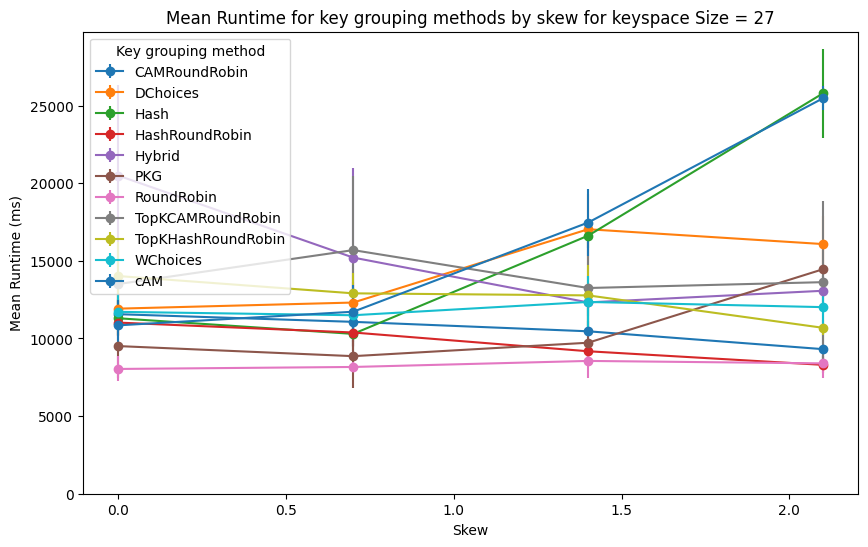

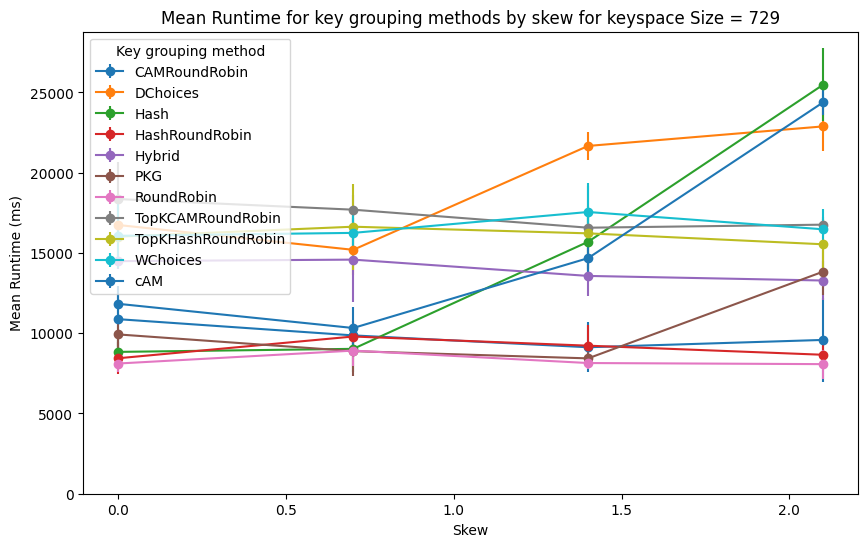

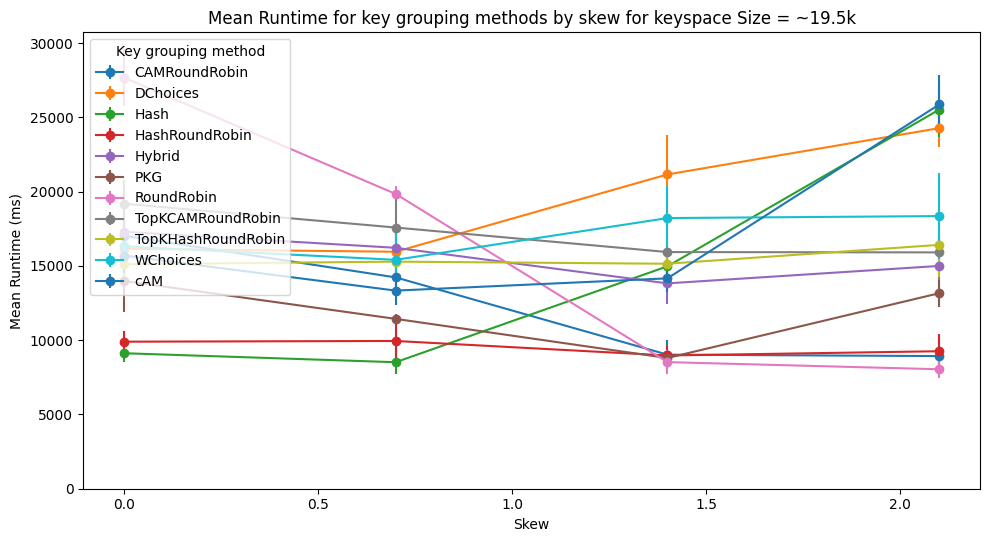

In [45]:
#PLOT FOR RUNTIME

for i in range(1,3+1):
    keysize_2_data = runtime_stats[runtime_stats['keySize'] == i].sort_values(by='skew')


    # Set up the plotting area
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot data for each operator
    for name, group in keysize_2_data.groupby('Operator'):
        if not group.empty:
            # print(group['skew'])
            ax.errorbar(group['skew'], group['mean runtime'], yerr=group['range']/2, fmt='-o', label=f'{name[4:]}')
        else:
            print(f"No data for Operator {name} with keySize == {i}")

    # Label the axes and the plot
    ax.set_xlabel('Skew')
    ax.set_ylabel('Mean Runtime (ms)')
    ax.set_title('Mean Runtime for key grouping methods by skew for keyspace Size = {}'.format(listOfKeySizes[i-1]))
    ax.legend(title='Key grouping method', loc='upper left')
     # Set the y-axis to start at 0
    ax.set_ylim(bottom=0)

    # Show the plot
    # plt.show()
    plt.savefig(experimentDirectory+"plot{}.png".format(i))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()



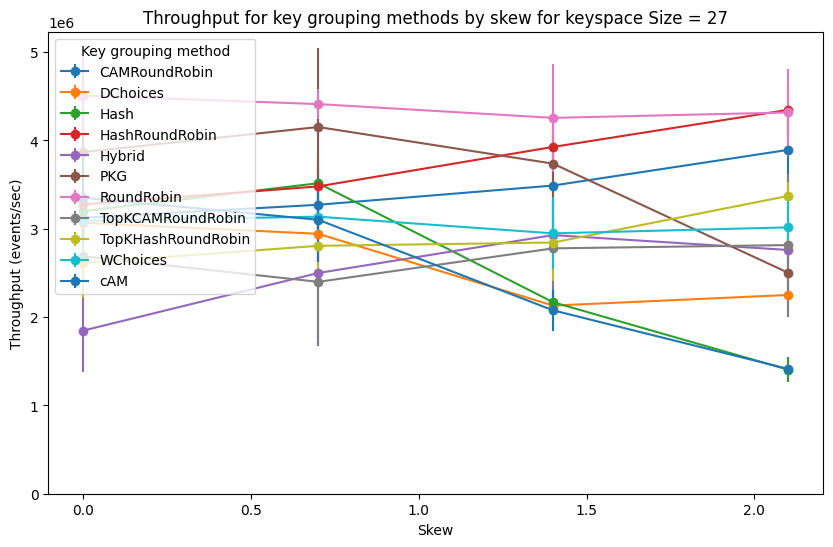

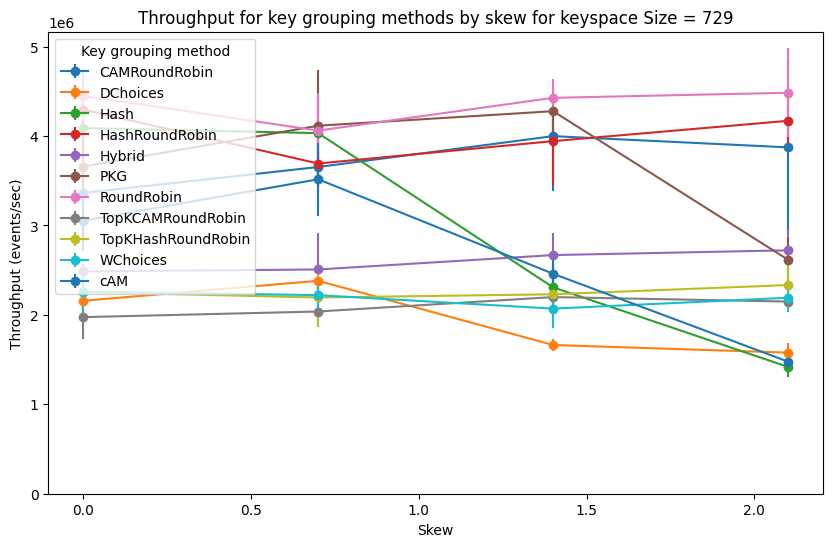

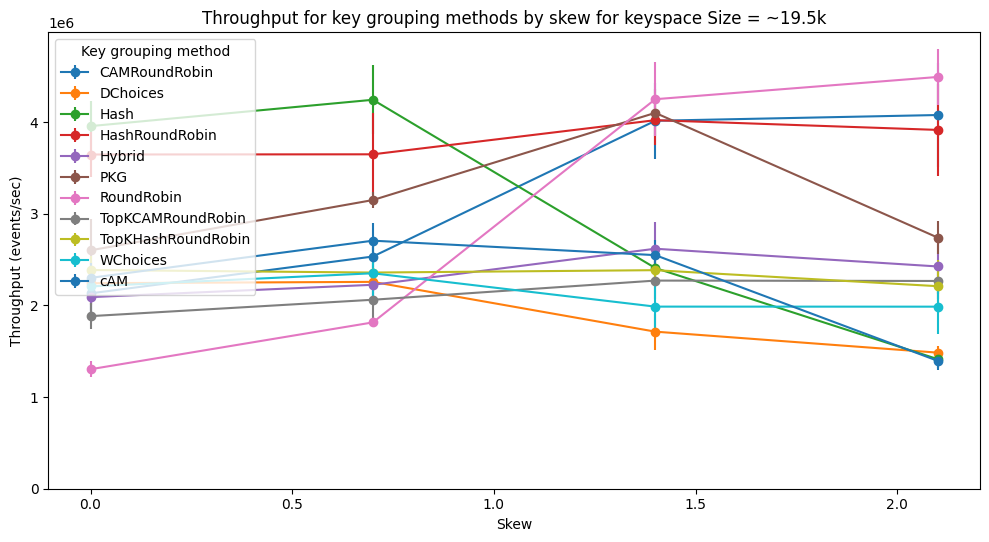

In [47]:
#PLOTS FOR THROUGHPUT
# Plot for Throughput

for i in range(1, 3+1):
    keysize_2_data = throughput_stats[throughput_stats['keySize'] == i].sort_values(by='skew')

    # Set up the plotting area
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot data for each operator
    for name, group in keysize_2_data.groupby('Operator'):
        if not group.empty:
            ax.errorbar(group['skew'], group['mean throughput'], yerr=group['range']/2, fmt='-o', label=f'{name[4:]}')
        else:
            print(f"No data for Operator {name} with keySize == {i}")

    # Label the axes and the plot
    ax.set_xlabel('Skew')
    ax.set_ylabel('Throughput (events/sec)')
    ax.set_title('Throughput for key grouping methods by skew for keyspace Size = {}'.format(listOfKeySizes[i-1]))
    ax.legend(title='Key grouping method', loc='upper left')
    # Set the y-axis to start at 0
    ax.set_ylim(bottom=0)

    # Show the plot
    plt.savefig("plot_throughput_{}.png".format(i))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


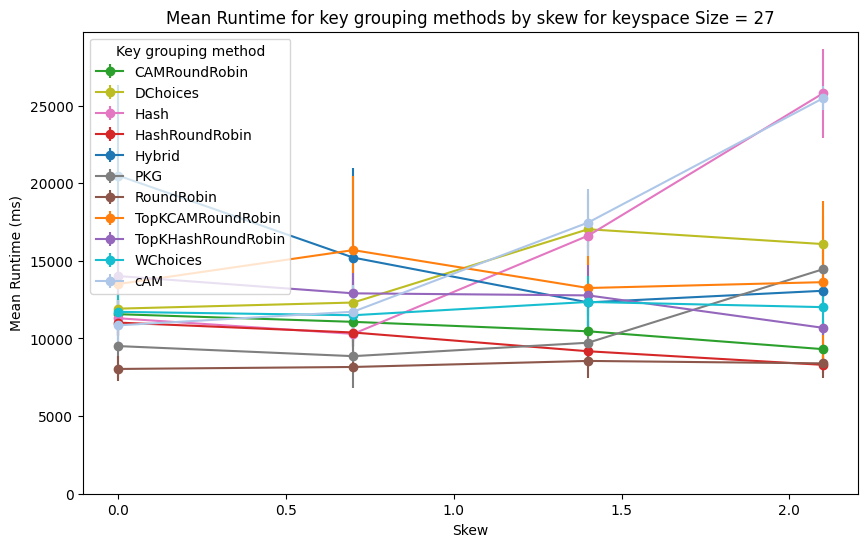

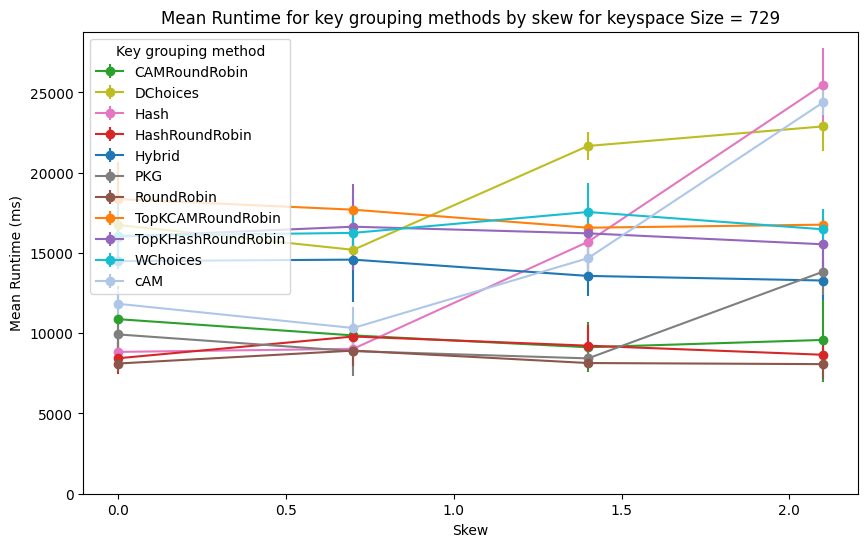

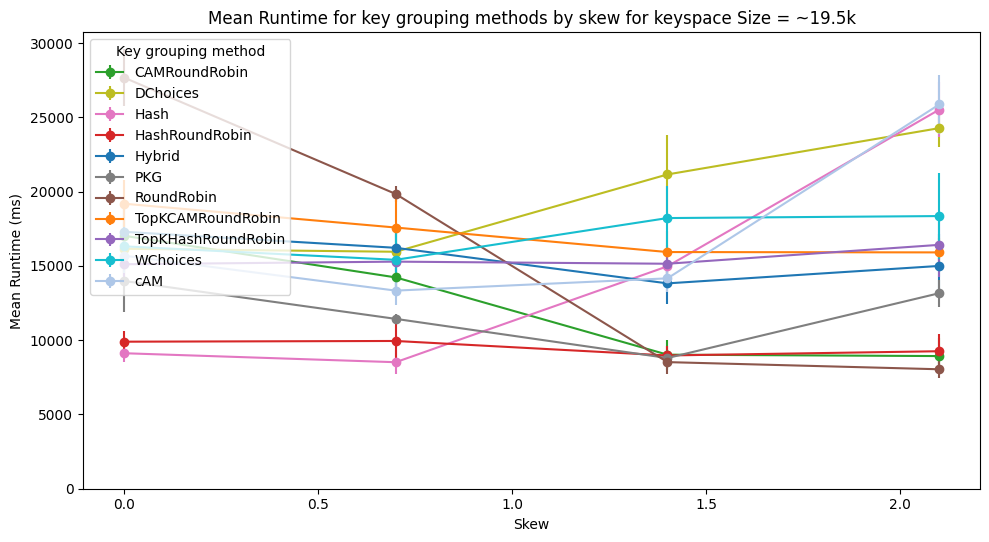

In [70]:
#PLOTS FOR GINI COEFFICIENT OF INTPUT
loadDistribution = throughputExtraction.select_best_rows(main_metrics_df, ['PartialFunctionNumRecordsIn'])


for i in range(1, 3+1):
    keysize_2_data = throughput_stats[throughput_stats['keySize'] == i].sort_values(by='skew')

    # Set up the plotting area
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot data for each operator
    for name, group in keysize_2_data.groupby('Operator'):
        if not group.empty:
            ax.errorbar(group['skew'], group['mean'], yerr=group['range']/2, fmt='-o', label=f'{name[4:]}')
        else:
            print(f"No data for Operator {name} with keySize == {i}")

    # Label the axes and the plot
    ax.set_xlabel('Skew')
    ax.set_ylabel('Throughput (events/sec)')
    ax.set_title('Throughput for key grouping methods by skew for keyspace Size = {}'.format(listOfKeySizes[i-1]))
    ax.legend(title='Key grouping method', loc='upper left')
    # Set the y-axis to start at 0
    ax.set_ylim(bottom=0)

    # Show the plot
    plt.savefig("plot_throughput_{}.png".format(i))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


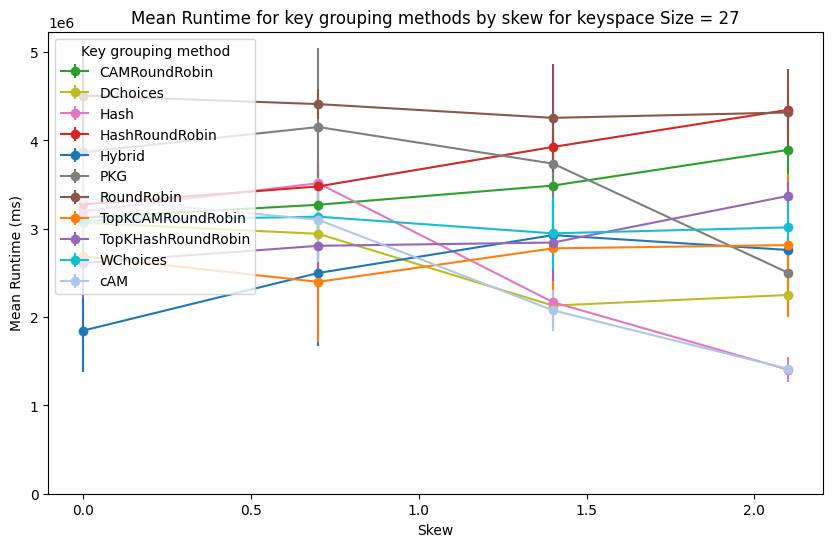

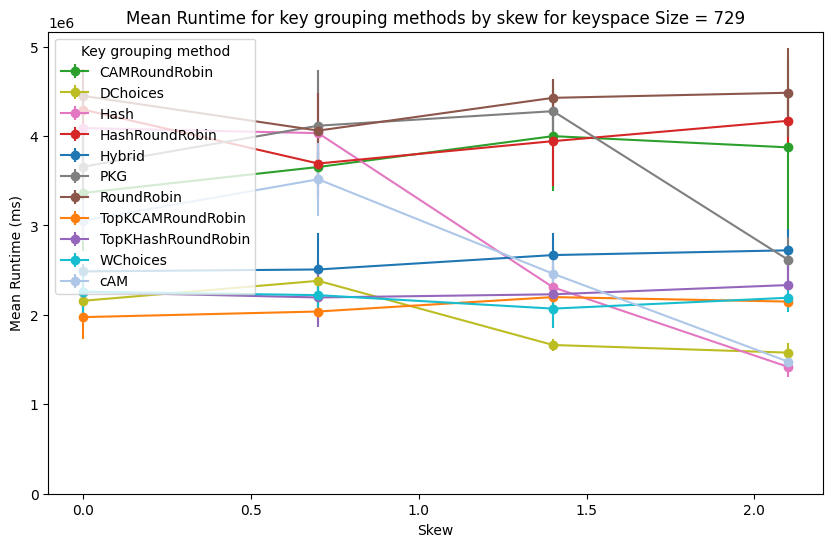

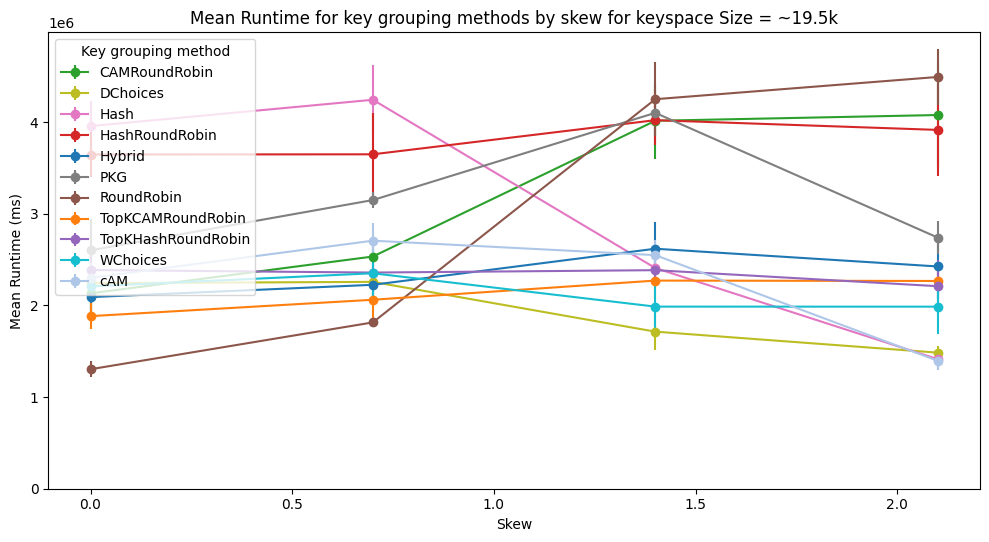

In [71]:
#PLOTS FOR INPUT TOTAL OUTPUT  /TOTAL THROUGHPUT